<a href="https://colab.research.google.com/github/ismael-rtellez/Deep_Neural_Network_Series_Assignment/blob/main/Deep_Neural_Network_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Neural Network Sprint

### [Problems 1-8]
---

*  Problem 1: Classifying fully connected layers
*  Problem 2: Classifying the initialization method
*  Problem 3: Classifying optimization methods
*  Problem 4: Classifying activation functions
*  Problem 5: ReLU class creation
*  Problem 6: Initial value of weight
*  Problem 7: Optimization method
*  Problem 8: Class completion

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Problem 1: Classifying fully connected layers
class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.optimizer = optimizer
        # Initialize self.W and self.B using the initializer method
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

    def forward(self, X):
        """
        forward
        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            input
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """
        self.X = X
        return np.dot(X, self.W) + self.B

    def backward(self, dA):
        """
        Backward
        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward
        """
        batch_size = self.X.shape[0]
        self.dW = np.dot(self.X.T, dA)
        self.dB = np.sum(dA, axis=0)
        dZ = np.dot(dA, self.W.T)

        # updating weights and biases
        self = self.optimizer.update(self)
        return dZ

# Problem 2: Classifying the initialization method
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """

    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W :
        """
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B :
        """
        return np.zeros(n_nodes2)

# Problem 3: Classifying optimization methods
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : Learning rate
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return layer

# Problem 4 & 5: Classifying activation functions and ReLU class creation
class Tanh:
    """Hyperbolic tangent activation function"""
    def forward(self, A):
        """forward propagation"""
        self.A = A
        return np.tanh(A)

    def backward(self, dZ):
        """Backward propagation"""
        return dZ * (1 - np.tanh(self.A)**2)

class Sigmoid:
    """Sigmoid activation function"""
    def forward(self, A):
        """forward propagation"""
        self.A = A
        return 1 / (1 + np.exp(-A))

    def backward(self, dZ):
        """Backward propagation"""
        sig = 1 / (1 + np.exp(-self.A))
        return dZ * sig * (1 -sig)

class ReLU:
    """ReLu activation function"""
    def forward(self, A):
        """forward propagation"""
        self.A = A
        return np.maximum(0, A)

    def backward(self, dZ):
        """Backward propagation"""
        return dZ * (self.A > 0)

class Softmax:
    """Softmax activation function with cross-entropy loss"""
    def forward(self, A):
        """forward propagation"""
        exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
        self.Z = exp_A / np.sum(exp_A, axis=1, keepdims=True)
        return self.Z

    def backward(self, Z, Y):
        """Backward propagation that will include cross-entropy gradient"""
        batch_size = Y.shape[0]
        return (Z - Y) / batch_size

# Problem 6: Initial value of weight
class XavierInitializer:
    """Xavier/Glorot initialization for sigmoid/tanh"""
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """Weights initialization"""
        sigma = np.sqrt(1 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """Bias initialization"""
        return np.zeros(n_nodes2)

class HeInitializer:
    """He initialization for ReLu"""
    def __init__(self):
        pass

    def W(self, n_nodes1, n_nodes2):
        """Weights initialization"""
        sigma = np.sqrt(2 / n_nodes1)
        return sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        """Bias initialization"""
        return np.zeros(n_nodes2)


# Problem 7: Optimization method
class AdaGrad:
    """AdaGrad optimization method"""
    def __init__(self, lr):
        self.lr = lr
        self.H = {} # Dictionary to storeH for each layer

    def update(self, layer):
        """Updating weights and biases with AdaGrad"""
        # Initializing H if not exists
        if id(layer) not in self.H:
            self.H[id(layer)] = {
                'HW' : np.zeros_like(layer.W),
                'HB' : np.zeros_like(layer.B)
            }

        HW = self.H[id(layer)]['HW']
        HB = self.H[id(layer)]['HB']

        # updating HW and HB
        HW += layer.dW ** 2
        HB += layer.dB ** 2

        # Updating weights and biases
        layer.W -= self.lr * (1 / (np.sqrt(HW) + 1e-7)) * layer.dW
        layer.B -= self.lr * (1 / (np.sqrt(HB) + 1e-7)) * layer.dB

        return layer


# Problem 8: Class completion
class ScratchDeepNeuralNetworkClassifier:
    """Deep neural network classifier"""
    def __init__(self, layers_config, initializer='simple', optimizer='sgd',
                 sigma=0.01, lr=0.01, epochs=10, batch_size=20, verbose=True):
        self.layers_config = layers_config
        self.sigma = sigma
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        # Initializing layers
        self._initialize_layers(initializer, optimizer)

        # For learning curve
        self.train_loss = []
        self.val_loss = []

    def _initialize_layers(self, initializer, optimizer):
        """Initialize layers based on configuration"""
        # selecting initializer
        if initializer == 'simple':
            initializer = SimpleInitializer(self.sigma)
        elif initializer == 'xavier':
            initializer = XavierInitializer()
        elif initializer == 'he':
            initializer = HeInitializer()

        # selcting optimizer
        if optimizer == 'sgd':
            optimizer = SGD(self.lr)
        elif optimizer == 'adagrad':
            optimizer = AdaGrad(self.lr)

        # Creating layers
        self.layers = []
        self.activations = []

        for i, config in enumerate(self.layers_config):
            # Adding FC layer
            n_nodes1 = config['input_dim'] if i == 0 else self.layers_config[i-1]['output_dim']
            n_nodes2 = config['output_dim']
            self.layers.append(FC(n_nodes1, n_nodes2, initializer, optimizer))

            # Adding activation
            if config['activation'] == 'tanh':
                self.activations.append(Tanh())
            elif config['activation'] == 'sigmoid':
                self.activations.append(Sigmoid())
            elif config['activation'] == 'relu':
                self.activations.append(ReLU())
            elif config['activation'] == 'softmax':
                self.activations.append(Softmax())
    def fit(self, X, y, X_val=None, y_val=None):
        """Train the model"""
        for epoch in range(self.epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

            for mini_X, mini_y in get_mini_batch:
                # Forward propagation
                A = mini_X
                for layer, activation in zip(self.layers, self.activations):
                    A = layer.forward(A)
                    Z = activation.forward(A)
                    A = Z

                # Backward propagation
                dA = self.activations[-1].backward(Z, mini_y)
                for i in reversed(range(len(self.layers))):
                    dZ = self.layers[i].backward(dA)
                    if i > 0:
                        dA = self.activations[i-1].backward(dZ)

            # Calculating loss
            train_loss = self._calc_loss(X, y)
            self.train_loss.append(train_loss)

            if X_val is not None and y_val is not None:
                val_loss = self._calc_loss(X_val, y_val)
                self.val_loss.append(val_loss)

            if self.verbose:
            # verbose is set to True, the learning process etc. is output.
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss : {train_loss:.4f}",
                      f", Val Loss: {val_loss:.4f}" if X_val is not None and y_val is not None else "")

    def _calc_loss(self, X, y):
        """Calculate cross-entropy loss"""
        # Forward propagation
        A = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z

        # Calculating loss
        delta = 1e-7
        return -np.sum(y * np.log(Z + delta)) / y.shape[0]

    def predict(self, X):
        """Make predictions"""
        # Forward propagation
        A = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z

        # Returning class with highest probability
        return np.argmax(Z, axis=1)

    def predict_proba(self, X):
        """Return probabilities estimates"""
        # Forward propagation
        A = X
        for layer, activation in zip(self.layers, self.activations):
            A = layer.forward(A)
            Z = activation.forward(A)
            A = Z

        return Z


class GetMiniBatch:
    """Iterador to get mini-batches"""

    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)
        self._counter = 0

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255

# One-hot encode labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from packaging.version import Version
import sklearn

if Version(sklearn.__version__) >= Version("1.2"):
    enc = OneHotEncoder(sparse_output=False)
else:
    enc = OneHotEncoder(sparse=False)

y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = enc.fit_transform(y_test.reshape(-1, 1))

# Splitting into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Converting one-hot back to labels for validation
y_val_labels = np.argmax(y_val, axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### [Problem 9] Learning and estimation
---

*  Learning and estimation using function: tanh and initializer: simple

In [ ]:
from sklearn.metrics import accuracy_score

layers_config = [
    {"input_dim": 784, "output_dim": 128, "activation": "tanh"},
    {"output_dim": 64, "activation": "tanh"},
    {"output_dim": 10, "activation": "softmax"}
]

model_simple = ScratchDeepNeuralNetworkClassifier(layers_config=layers_config, initializer='simple', sigma=0.01,
                                           optimizer='sgd', lr=0.01, epochs=5, batch_size=32, verbose=True)
model_simple.fit(X_train, y_train, X_val, y_val)

# Predictions
y_pred_simple = model_simple.predict(X_val)

# Accuracy
accuracy = np.mean(y_pred_simple == y_val_labels)
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/5, Train Loss : 2.2856 , Val Loss: 2.2861
Epoch 2/5, Train Loss : 1.1663 , Val Loss: 1.1631
Epoch 3/5, Train Loss : 0.6072 , Val Loss: 0.6003
Epoch 4/5, Train Loss : 0.4924 , Val Loss: 0.4898
Epoch 5/5, Train Loss : 0.4220 , Val Loss: 0.4240
Validation Accuracy: 0.8818


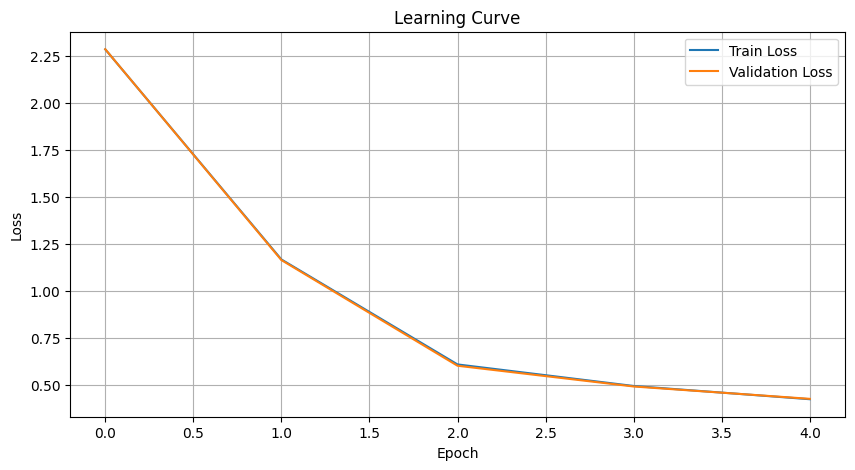

In [ ]:
# Plotting the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(model_simple.train_loss, label='Train Loss')
plt.plot(model_simple.val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

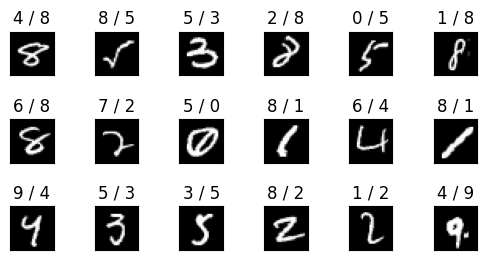

In [ ]:
num = 18  # How many to display
true_false = y_pred_simple == y_val_labels
false_list = np.where(true_false == False)[0].astype(int) # Changed from np.int to int

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred_simple[false_list[i]], y_val_labels[false_list[i]]))
    ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')
plt.show()

*  Learning and estimation using function: sigmoid, initializer: Xavier, optimizer: sgd

In [ ]:
from sklearn.metrics import accuracy_score

layers_config = [
    {"input_dim": 784, "output_dim": 128, "activation": "sigmoid"},
    {"output_dim": 64, "activation": "sigmoid"},
    {"output_dim": 10, "activation": "softmax"}
]

model_xavier = ScratchDeepNeuralNetworkClassifier(layers_config=layers_config, initializer='xavier', optimizer='sgd',
                                           lr=0.01, epochs=5, batch_size=32, verbose=True)
model_xavier.fit(X_train, y_train, X_val, y_val)

# Predictions
y_pred_xavier = model_xavier.predict(X_val)

# Accuracy
accuracy = np.mean(y_pred_xavier == y_val_labels)
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/5, Train Loss : 2.2274 , Val Loss: 2.2290
Epoch 2/5, Train Loss : 1.9865 , Val Loss: 1.9894
Epoch 3/5, Train Loss : 1.4842 , Val Loss: 1.4874
Epoch 4/5, Train Loss : 1.1159 , Val Loss: 1.1166
Epoch 5/5, Train Loss : 0.8736 , Val Loss: 0.8725
Validation Accuracy: 0.7817


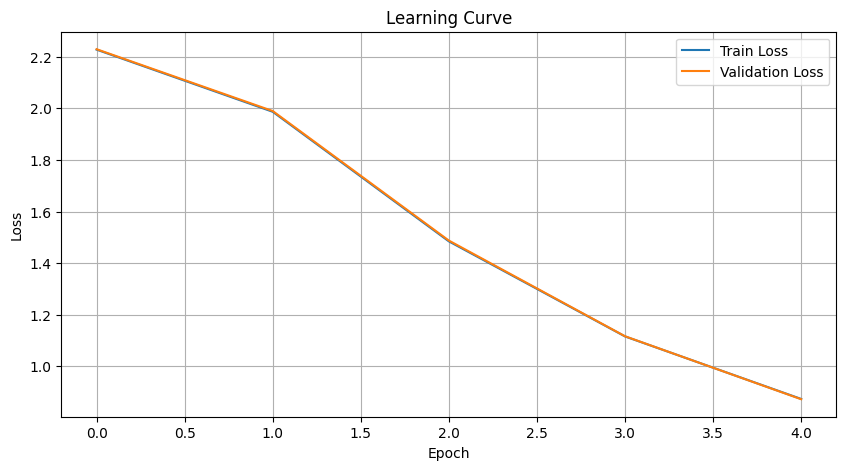

In [ ]:
# Plotting the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(model_xavier.train_loss, label='Train Loss')
plt.plot(model_xavier.val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

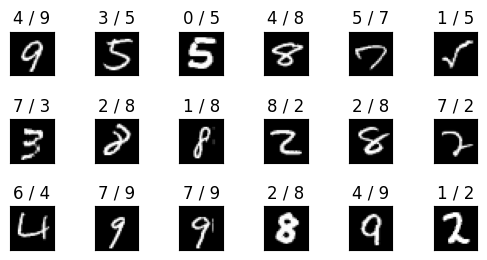

In [ ]:
num = 18  # How many to display
true_false = y_pred_xavier == y_val_labels
false_list = np.where(true_false == False)[0].astype(int) # Changed from np.int to int

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred_xavier[false_list[i]], y_val_labels[false_list[i]]))
    ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')
plt.show()

*  Learning and estimation using function: relu, initializer: he and optimizer: adagrad

In [ ]:
from sklearn.metrics import accuracy_score

layers_config = [
    {"input_dim": 784, "output_dim": 128, "activation": "relu"},
    {"output_dim": 64, "activation": "relu"},
    {"output_dim": 10, "activation": "softmax"}
]

model_he = ScratchDeepNeuralNetworkClassifier(layers_config, initializer='he', optimizer='adagrad',
                                           lr=0.01, epochs=5, batch_size=32, verbose=True)
model_he.fit(X_train, y_train, X_val, y_val)

# Predictions
y_pred_he = model_he.predict(X_val)

# Accuracy
accuracy = np.mean(y_pred_he == y_val_labels)
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/5, Train Loss : 0.1447 , Val Loss: 0.1616
Epoch 2/5, Train Loss : 0.1118 , Val Loss: 0.1354
Epoch 3/5, Train Loss : 0.0932 , Val Loss: 0.1213
Epoch 4/5, Train Loss : 0.0810 , Val Loss: 0.1124
Epoch 5/5, Train Loss : 0.0719 , Val Loss: 0.1062
Validation Accuracy: 0.9691


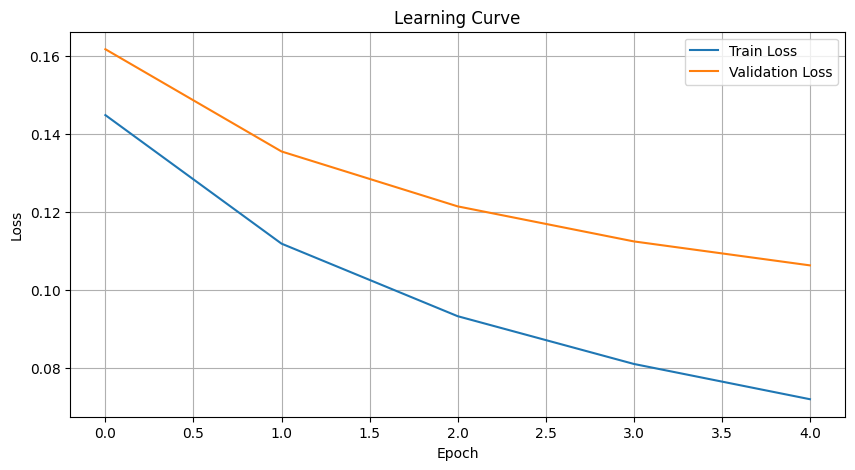

In [ ]:
# Plotting the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(model_he.train_loss, label='Train Loss')
plt.plot(model_he.val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

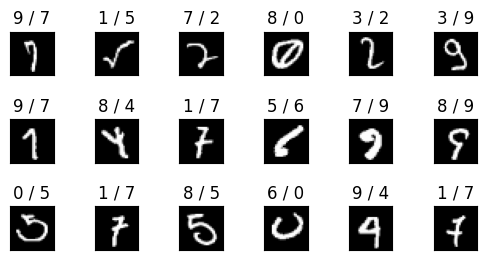

In [ ]:
num = 18  # How many to display
true_false = y_pred_he == y_val_labels
false_list = np.where(true_false == False)[0].astype(int) # Changed from np.int to int

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred_he[false_list[i]], y_val_labels[false_list[i]]))
    ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')
plt.show()